In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [2]:
df=pd.read_csv("Brain_size.csv", sep=";" ,na_values=".")
df.head()

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


less nan values can be removed but  more number of nan values should 
not be removed 

In [3]:
df.tail()

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
35,36,Female,133,129,128,153.0,66.5,948066
36,37,Male,140,150,124,144.0,70.5,949395
37,38,Female,88,86,94,139.0,64.5,893983
38,39,Male,81,90,74,148.0,74.0,930016
39,40,Male,89,91,89,179.0,75.5,935863


In [4]:
df.head()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [5]:
df.sample(4)

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
6,7,Female,138,136,131,138.0,64.5,991305
8,9,Male,89,93,84,134.0,66.3,904858
29,30,Female,130,126,124,159.0,66.5,866662
20,21,Male,83,83,86,NaN,NaN,892420


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         40 non-null     int64  
 1   Gender     40 non-null     object 
 2   FSIQ       40 non-null     int64  
 3   VIQ        40 non-null     int64  
 4   PIQ        40 non-null     int64  
 5   Weight     38 non-null     float64
 6   Height     39 non-null     float64
 7   MRI_Count  40 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 2.6+ KB


In [7]:
df.isna().sum()

id           0
Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

In [8]:
df.isnull()

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


<AxesSubplot:>

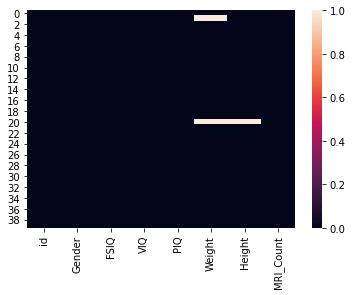

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.columns

Index(['id', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

In [11]:
df.describe ()

,id,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [12]:
df.MRI_Count.unique

<bound method Series.unique of 0      816932
1     1001121
2     1038437
3      965353
4      951545
5      928799
6      991305
7      854258
8      904858
9      955466
10     833868
11    1079549
12     924059
13     856472
14     878897
15     865363
16     852244
17     945088
18     808020
19     889083
20     892420
21     905940
22     790619
23     955003
24     831772
25     935494
26     798612
27    1062462
28     793549
29     866662
30     857782
31     949589
32     997925
33     879987
34     834344
35     948066
36     949395
37     893983
38     930016
39     935863
Name: MRI_Count, dtype: int64>

<AxesSubplot:xlabel='Gender', ylabel='count'>

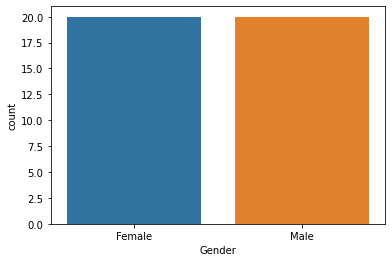

In [13]:
sns.countplot(x="Gender", data=df)

<AxesSubplot:xlabel='Height', ylabel='Density'>

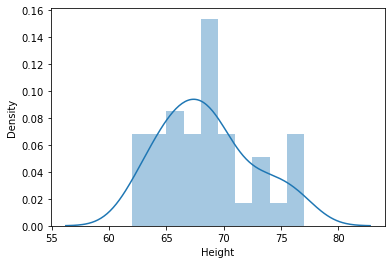

In [14]:
sns.distplot(df["Height"],bins=10)
#dist plot helps in cheking out the skewness

<AxesSubplot:xlabel='Height'>

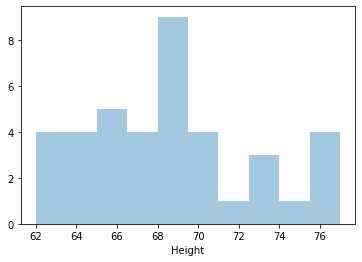

In [15]:
sns.distplot(df["Height"],bins=10,kde=False)

<AxesSubplot:xlabel='Weight'>

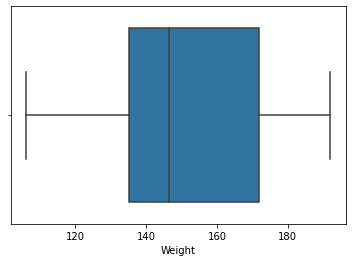

In [16]:
sns.boxplot(df["Weight"], data=df)

Text(0.5, 1.0, ' FSIQ box plot')

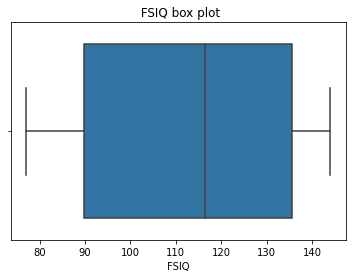

In [17]:
sns.boxplot(df["FSIQ"], data=df)
plt.title(" FSIQ box plot")

<AxesSubplot:>

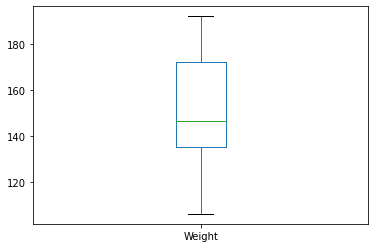

In [18]:
df["Weight"].plot.box()

In [19]:
df.isnull().sum()

id           0
Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

In [20]:
#this replaces the nan values  with the meanof the column
df["Weight"].replace(np.NaN,df["Weight"].mean, inplace=True)
df["Height"].replace(np.NaN,df["Height"].mean, inplace=True)

In [21]:
df.isnull().sum()

id           0
Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64

In [22]:
#this will drop the NaN value 
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

id           0
Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64

<AxesSubplot:>

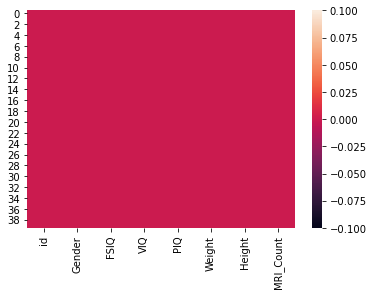

In [24]:
sns.heatmap(df.isnull())

<AxesSubplot:>

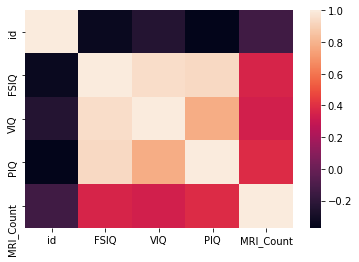

In [25]:
sns.heatmap(df.corr())

<AxesSubplot:>

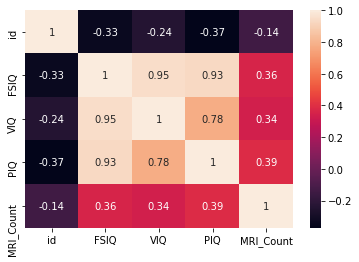

In [26]:
sns.heatmap(df.corr(),annot=True)